# Question 1

In [1]:
import nltk
import re
import operator
import glob
import csv
import math
import matplotlib.pyplot as plt

In [2]:
txt_list = nltk.corpus.inaugural.fileids();     # getting Inauural text files
word_repo =[]                                   # Master  word list
word_repo_clean =[]                             # Master word list with clean data
freq_log= []                                    # List to store log value of frquency of words
rank_log =[]                                    # List to store log value of rank of words


file_list= glob.glob('C:\\Users\SONY\Documents\gutenberg\*.txt')   #Glob function to get all .txt files from local machine
#print(file_list)

for f in file_list:
    word_list =nltk.corpus.gutenberg.words(f)   # getting only words
    for w in word_list:
        pattern = re.compile("[a-zA-Z]")        # getting only words that contain alphabets
        if pattern.match(w):
            word_repo.append(w.lower())
#print(word_repo)
#len(word_repo)
frequency = {}                                  #Declaring dictionary for unique word and its frequency
for w in word_repo:
    if w not in frequency:
        frequency[w]=1
    else:
        frequency[w]+=1
#sorted_frequency = sorted(frequency.items(), key=operator.itemgetter(1), reverse=True)
sorted_frequency= (sorted(frequency.items(), key=lambda x:x[1],reverse=True)) # Lamda function to sort 
#sorting words with frequency in descending order
#print(sorted_frequency)
#type(sorted_frequency)



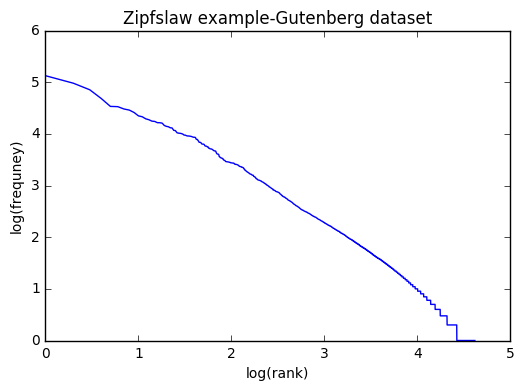

In [3]:
c = 0                 #Count for rank 
temp =0
final_list =[]       # Final list with word, frequency and rank

def mylogvalue(a):           #Function to calculate log value
    var_log = math.log10(a)
    return var_log

for x,y in sorted_frequency:
    c=c+1
                                        #looping through tuple and each word and frequency
    #print(y)
#     if y!=temp:
#         c=c+1
#     else:
#         c=c
    final_list.append([x,y,c])
    #var_freq_log =math.log10(y)      # Calculating log values
    var_freq_log = mylogvalue(y)
    freq_log.append(var_freq_log)
    #var_ran_log = math.log10(c)
    var_ran_log = mylogvalue(c)
    rank_log.append(var_ran_log)
    temp=y                           # Changing temp value to compare with previous value in next loop
#print(final_list)    #Final list with rank
#print(freq_log)
#print(rank_log)

plt.plot(rank_log,freq_log)
plt.title('Zipfslaw example-Gutenberg dataset')
plt.xlabel('log(rank)')
plt.ylabel('log(frequney)')
plt.show()

In [4]:
file = open('zipfsdemo.csv','w',newline='')   # code to write list into CSV
writer =csv.writer(file)
writer.writerow([ "Word","frequency","Rank"])
for b in final_list: 
    writer.writerow(b)



# Conclusion

As per zipf's law frequency of any word is inversely proportional to the rank of a word. Here I have analyzed unique 41534 words from Gutenberg corpus. Word with most no. of occurrence are ranked higher than words with less no. of occurrence are ranked as lower. When the logarithmic value of rank to frequency is plotted on an X-Y plot. It is found that higher the occurrence of a word more is it rank. This holds true for any language words occurrence.As graph is having slope -1 it proves Zipf's law where word with lower frequency are present at the bottom of graph and graph has slightly bulge as there are more words with low frequency. 